## Emergency Readmission EDA

In [87]:
!pip install psycopg2
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db.db_utils import get_engine

In [89]:
# Load from PostgreSQL 
engine = get_engine()

df = pd.read_sql('SELECT * FROM readmission_cleaned', con = engine)

In [90]:
df.head()

,Year,Quarter,Period of coverage,Breakdown,Level,Level description,Indicator value,Lower CI,Upper CI,Standardised ratio,Standardised ratio lower CI,Standardised ratio upper CI,Observed,Population,Expected,Percent unclassified,Category
0,2023/24,Annual,1/4/2023 to 31/3/2024,England,England,England,841.8,839.5,844.1,102.6,102.3,102.9,521065.0,57690300,507865.9,NaN,National
1,2022/23,Annual,1/4/2022 to 31/3/2023,England,England,England,780.8,778.6,783.0,95.2,94.9,95.4,476774.0,57106400,500993.5,NaN,National
2,2021/22,Annual,1/4/2021 to 31/3/2022,England,England,England,808.9,806.6,811.2,98.6,98.3,98.9,486173.0,56554900,493128.1,NaN,National
3,2020/21,Annual,1/4/2020 to 31/3/2021,England,England,England,662.2,660.2,664.3,80.7,80.5,81.0,397738.0,56550100,492767.4,NaN,National
4,2019/20,Annual,1/4/2019 to 31/3/2020,England,England,England,862.1,859.8,864.5,105.1,104.8,105.4,512608.0,56287000,487822.8,NaN,National


In [91]:
# Overview 
print('Shape: ', df.shape)
print('Columns: ', df.columns.tolist())
print('Missing values:\n', df.isna().sum())
display(df.describe())

Shape:  (57639, 17)
Columns:  ['Year', 'Quarter', 'Period of coverage', 'Breakdown', 'Level', 'Level description', 'Indicator value', 'Lower CI', 'Upper CI', 'Standardised ratio', 'Standardised ratio lower CI', 'Standardised ratio upper CI', 'Observed', 'Population', 'Expected', 'Percent unclassified', 'Category']
Missing values:
 Year                              0
Quarter                           0
Period of coverage                0
Breakdown                         0
Level                             0
Level description                 0
Indicator value                   0
Lower CI                          0
Upper CI                          0
Standardised ratio                0
Standardised ratio lower CI       0
Standardised ratio upper CI       0
Observed                          0
Population                        0
Expected                          0
Percent unclassified           8838
Category                          0
dtype: int64


,Indicator value,Lower CI,Upper CI,Standardised ratio,Standardised ratio lower CI,Standardised ratio upper CI,Observed,Population,Expected,Percent unclassified
count,57639.000000,57639.000000,57639.000000,57639.000000,57639.000000,57639.000000,57639.000000,5.763900e+04,57639.000000,48801.000000
mean,316.920037,294.549588,341.166365,101.855744,92.131189,114.866826,2591.085741,4.108268e+06,2558.128425,0.115663
std,329.741074,321.247839,338.923341,45.938425,39.794713,68.910182,13193.478649,1.332866e+07,13046.439169,0.026125
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,2.200000e+03,0.700000,0.050000
25%,159.700000,140.500000,180.100000,79.700000,70.800000,88.800000,236.000000,1.163000e+05,271.300000,0.100000
50%,212.700000,192.700000,234.900000,98.200000,89.700000,107.100000,485.000000,1.955000e+05,450.000000,0.120000
75%,301.000000,277.500000,326.700000,118.900000,109.600000,129.800000,1125.000000,3.377000e+05,1175.200000,0.130000
max,6001.700000,5935.500000,6068.500000,2368.100000,1930.900000,2874.700000,521065.000000,5.769030e+07,507865.900000,0.180000


In [92]:
# Explore breakdown and level_description
df['Breakdown'].value_counts()

Breakdown
Lower tier local authority    33805
Upper tier local authority    15954
Condition                      3675
Age                            1995
Region                          945
2015 Deprivation decile         800
Gender                          210
2019 Deprivation decile         150
England                         105
Name: count, dtype: int64

In [93]:
df['Level description'].value_counts().head(20)

Level description
Westminster                    210
Kingston upon Thames           210
Waltham Forest                 210
Hounslow                       210
Walsall                        210
Wakefield                      210
Isle of Wight                  210
Isles of Scilly                210
Islington                      210
Kensington and Chelsea         210
Kingston upon Hull, City of    210
Kirklees                       210
Dudley                         210
Knowsley                       210
Lambeth                        210
Leeds                          210
Leicester                      210
Trafford                       210
Lewisham                       210
Tower Hamlets                  210
Name: count, dtype: int64

In [94]:
# Count the missing values per column
df.isnull().sum()

Year                              0
Quarter                           0
Period of coverage                0
Breakdown                         0
Level                             0
Level description                 0
Indicator value                   0
Lower CI                          0
Upper CI                          0
Standardised ratio                0
Standardised ratio lower CI       0
Standardised ratio upper CI       0
Observed                          0
Population                        0
Expected                          0
Percent unclassified           8838
Category                          0
dtype: int64

In [95]:
df['Level description'].unique()

array(['England', 'Female', 'Male', '0 to 4', '5 to 9', '10 to 14',
       '15 to 18', '19 to 24', '25 to 29', '30 to 34', '35 to 39',
       '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64',
       '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90+',
       'Adur', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford', 'Babergh',
       'Barking and Dagenham', 'Barnet', 'Barnsley', 'Basildon',
       'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham',
       'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Bolsover',
       'Bolton', 'Boston', 'Bournemouth, Christchurch and Poole',
       'Bracknell Forest', 'Bradford', 'Braintree', 'Breckland', 'Brent',
       'Brentwood', 'Brighton and Hove', 'Bristol, City of', 'Broadland',
       'Bromley', 'Bromsgrove', 'Broxbourne', 'Broxtowe',
       'Buckinghamshire', 'Burnley', 'Bury', 'Calderdale', 'Cambridge',
       'Camden', 'Cannock Chase', 'Canterbury', 'Castle P

In [96]:
sex_labels = ['Male', 'Female']
national_labels = ['England']
age_groups = [f'{i} to {i+4}' for i in range(0, 90, 5)] + ['90+']
deprivation_labels = ['1 - Most deprived', '10 - Least deplrived'] + [str(i) for i in range(2, 10)]

known_regions = ['Adur', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford', 'Babergh', 'Barking and Dagenham', 'Barnet', 'Barnsley', 'Basildon',
                 'Basingstoke and Deane', 'Bassetlaw', 'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham','Blaby', 
                 'Blackburn with Darwen', 'Blackpool', 'London', 'Bolsover', 'Bolton', 'Boston', 'Bournemouth, Christchurch and Poole', 
                 'Bracknell Forest', 'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood', 'Brighton and Hove', 'Bristol, City of', 
                 'Broadland', 'Bromley', 'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Buckinghamshire', 'Burnley', 'Bury', 'Calderdale', 
                 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury', 'Castle Point', 'Central Bedfordshire', 'Charnwood', 'Chelmsford', 
                 'Cheltenham', 'Cherwell', 'Cheshire East', 'Cheshire West and Chester', 'Chesterfield', 'Chichester', 'Chorley', 
                 'City of London', 'Colchester', 'Cornwall', 'Cotswold', 'County Durham', 'Coventry', 'Crawley', 'Croydon', 'Cumberland', 
                 'Dacorum', 'Darlington', 'Dartford', 'Derby', 'Derbyshire Dales', 'Doncaster', 'Dorset', 'Dover', 'Dudley', 'Ealing', 
                 'East Cambridgeshire', 'East Devon', 'East Hampshire', 'East Hertfordshire', 'East Lindsey', 'East Riding of Yorkshire', 
                 'East Staffordshire', 'East Suffolk', 'Eastbourne', 'Eastleigh', 'Elmbridge', 'Enfield', 'Epping Forest', 'Epsom and Ewell',
                 'Erewash', 'Exeter', 'Fareham', 'Fenland', 'Folkestone and Hythe', 'Forest of Dean', 'Fylde', 'Gateshead', 'Gedling', 
                 'Gloucester', 'Gosport', 'Gravesham', 'Great Yarmouth', 'Greenwich', 'Guildford', 'Hackney', 'Halton', 
                 'Hammersmith and Fulham', 'Harborough', 'Haringey', 'Harlow', 'Harrow', 'Hart', 'Hartlepool', 'Hastings', 'Havant', 
                 'Havering', 'Herefordshire, County of', 'Hertsmere', 'High Peak', 'Hillingdon', 'Hinckley and Bosworth', 'Horsham', 
                 'Hounslow', 'Huntingdonshire', 'Hyndburn', 'Ipswich', 'Isle of Wight', 'Isles of Scilly', 'Islington', 
                 'Kensington and Chelsea', "King's Lynn and West Norfolk", 'Kingston upon Hull, City of', 'Kingston upon Thames', 
                 'Kirklees', 'Knowsley', 'Lambeth', 'Lancaster', 'Leeds', 'Leicester', 'Lewes', 'Lewisham', 'Lichfield', 'Lincoln', 
                 'Liverpool', 'Luton', 'Maidstone', 'Maldon', 'Malvern Hills', 'Manchester', 'Mansfield', 'Medway', 'Melton', 'Merton', 
                 'Mid Devon', 'Mid Suffolk', 'Mid Sussex', 'Middlesbrough', 'Milton Keynes', 'Mole Valley', 'New Forest',
                 'Newark and Sherwood', 'Newcastle upon Tyne', 'Newcastle-under-Lyme', 'Newham', 'North Devon', 'North East Derbyshire', 
                 'North East Lincolnshire', 'North Hertfordshire', 'North Kesteven', 'North Lincolnshire', 'North Norfolk', 
                 'North Northamptonshire', 'North Somerset', 'North Tyneside', 'North Warwickshire', 'North West Leicestershire', 
                 'North Yorkshire', 'Northumberland', 'Norwich', 'Nottingham', 'Nuneaton and Bedworth', 'Oadby and Wigston', 'Oldham', 
                 'Oxford', 'Pendle', 'Peterborough', 'Plymouth', 'Portsmouth', 'Preston', 'Reading', 'Redbridge', 'Redcar and Cleveland', 
                 'Redditch', 'Reigate and Banstead', 'Ribble Valley', 'Richmond upon Thames', 'Rochdale', 'Rochford', 'Rossendale', 
                 'Rother', 'Rotherham', 'Rugby', 'Runnymede', 'Rushcliffe', 'Rushmoor', 'Rutland', 'Salford', 'Sandwell', 'Sefton', 
                 'Sevenoaks', 'Sheffield', 'Shropshire', 'Slough', 'Solihull', 'Somerset', 'South Cambridgeshire', 'South Derbyshire',
                 'South Gloucestershire', 'South Hams', 'South Holland', 'South Kesteven', 'South Norfolk', 'South Oxfordshire',
                 'South Ribble', 'South Staffordshire', 'South Tyneside', 'Southampton', 'Southend-on-Sea', 'Southwark', 'Spelthorne',
                 'St Albans', 'St. Helens', 'Stafford', 'Staffordshire Moorlands', 'Stevenage', 'Stockport', 'Stockton-on-Tees', 
                 'Stoke-on-Trent', 'Stratford-on-Avon', 'Stroud', 'Sunderland', 'Surrey Heath', 'Sutton', 'Swale', 'Swindon', 'Tameside', 
                 'Tamworth', 'Tandridge', 'Teignbridge', 'Telford and Wrekin', 'Tendring', 'Test Valley', 'Tewkesbury', 'Thanet', 
                 'Three Rivers', 'Thurrock', 'Tonbridge and Malling', 'Torbay', 'Torridge', 'Tower Hamlets', 'Trafford', 'Tunbridge Wells', 
                 'Uttlesford', 'Vale of White Horse', 'Wakefield', 'Walsall', 'Waltham Forest', 'Wandsworth', 'Warrington', 'Warwick', 
                 'Watford', 'Waverley', 'Wealden', 'Welwyn Hatfield', 'West Berkshire', 'West Devon', 'West Lancashire', 'West Lindsey', 
                 'West Northamptonshire', 'West Oxfordshire', 'West Suffolk', 'Westminster', 'Westmorland and Furness', 'Wigan', 
                 'Wiltshire', 'Winchester', 'Windsor and Maidenhead', 'Wirral', 'Woking', 'Wokingham', 'Wolverhampton', 'Worcester', 
                 'Worthing', 'Wychavon', 'Wyre', 'Wyre Forest', 'York', 'Allerdale', 'Barrow-in-Furness', 'Carlisle', 'Copeland', 'Craven', 
                 'Eden', 'Hambleton', 'Harrogate', 'Mendip', 'Richmondshire', 'Ryedale', 'Scarborough', 'Sedgemoor', 'Selby', 
                 'Somerset West and Taunton', 'South Lakeland', 'South Somerset', 'Corby', 'Daventry', 'East Northamptonshire', 'Kettering', 
                 'Northampton', 'South Northamptonshire', 'Wellingborough', 'Aylesbury Vale', 'Chiltern', 'South Bucks', 'Wycombe', 
                 'Bournemouth', 'Christchurch', 'East Dorset', 'Forest Heath', 'North Dorset', 'Poole', 'Purbeck', 'St Edmundsbury', 
                 'Suffolk Coastal', 'Taunton Deane', 'Waveney', 'West Dorset', 'West Somerset', 'Weymouth and Portland', 'Shepway',
                 'Cambridgeshire', 'Derbyshire', 'Devon', 'East Sussex', 'Essex', 'Gloucestershire', 'Hampshire', 'Hertfordshire', 'Kent',
                 'Lancashire', 'Leicestershire', 'Lincolnshire', 'Norfolk', 'Nottinghamshire', 'Oxfordshire', 'Staffordshire', 'Suffolk',
                 'Surrey', 'Warwickshire', 'West Sussex', 'Worcestershire', 'Cumbria', 'Northamptonshire', 'East Midlands', 'East of England',
                 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and The Humber']

known_conditions = ['Acute bronchitis', 'Angina pectoris', 'Asthma', 'Atrial fibrillation and flutter', 'Bronchiectasis',
                    'Chronic ischaemic heart disease', 'Chronic viral hepatitis B with delta-agent', 
                    'Chronic viral hepatitis B without delta-agent', 'Dementia in Alzheimer disease',
                    'Dementia in other diseases classified elsewhere', 'Emphysema', 'Epilepsy', 'Essential (primary) hypertension',
                    'Folate deficiency anaemia', 'Heart failure', 'Hypertensive heart and renal disease with (congestive) heart failure',
                    'Hypertensive heart disease with (congestive) heart failure', 
                    'Hypertensive heart disease without (congestive) heart failure', 'Insulin-dependent diabetes mellitus',
                    'Iron deficiency anaemia, unspecified', 'Malnutrition-related diabetes mellitus',
                    'Non-insulin-dependent diabetes mellitus', 'Other chronic obstructive pulmonary disease',
                    'Other iron deficiency anaemias', 'Other specified diabetes mellitus', 'Pulmonary oedema', 'Sideropenic dysphagia',
                    'Simple and mucopurulent chronic bronchitis', 'Status asthmaticus', 'Status epilepticus', 
                    'Unspecified chronic bronchitis', 'Unspecified dementia', 'Unspecified diabetes mellitus','Vascular dementia', 
                    'Vitamin B12 deficiency anaemia']

def categorise_level_description(value):
    if value in national_labels:
        return 'National'
    elif value in sex_labels:
        return 'Sex'
    elif value in age_groups:
        return 'Age group'
    elif value in deprivation_labels:
        return 'Deprivation'
    elif value in known_regions:
        return 'Region'
    elif value in known_conditions:
        return 'Condition'
    else:
        return 'Umknown'

df['Category'] = df['Level description'].apply(categorise_level_description)
df.to_csv('../data/processed/cleaned_with_categories.csv', index=False)
print("Category column added and file saved as 'cleaned_with_categories.csv'")

Category column added and file saved as 'cleaned_with_categories.csv'


### ------ Initial Distribution Plots -------

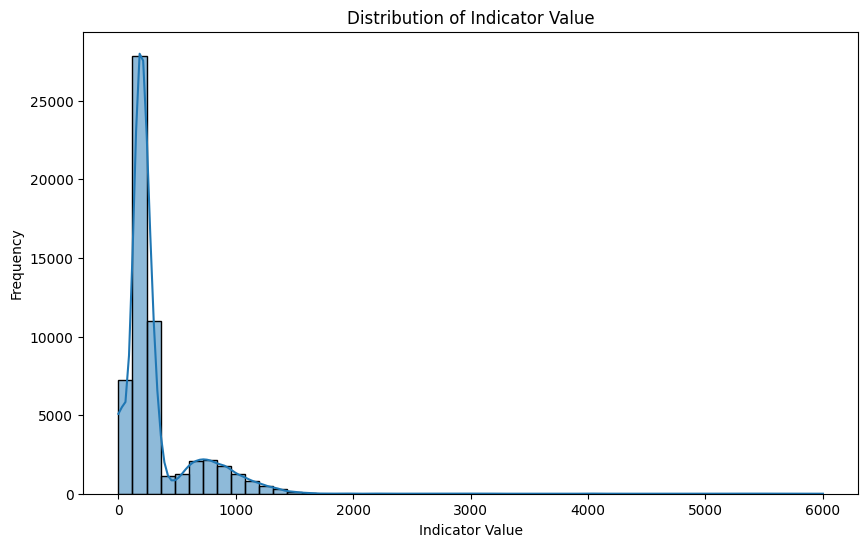

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Indicator value'], kde=True, bins=50)
plt.title('Distribution of Indicator Value')
plt.xlabel('Indicator Value')
plt.ylabel('Frequency')
plt.show()

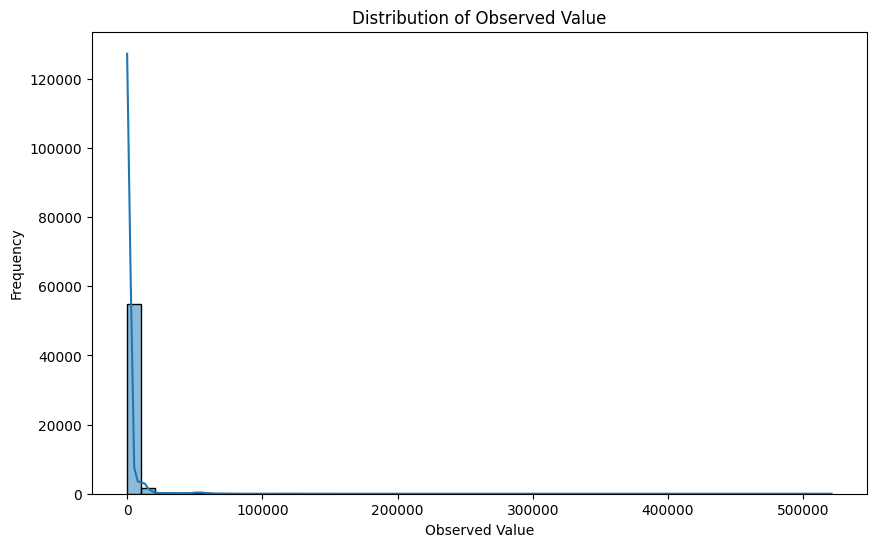

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Observed'], kde=True, bins=50)
plt.title('Distribution of Observed Value')
plt.xlabel('Observed Value')
plt.ylabel('Frequency')
plt.show()

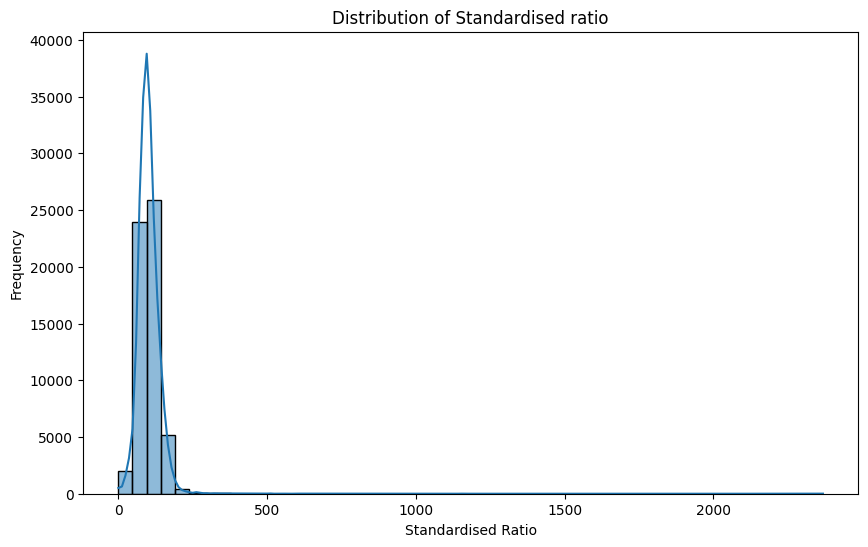

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Standardised ratio'], kde=True, bins=50)
plt.title('Distribution of Standardised ratio')
plt.xlabel('Standardised Ratio')
plt.ylabel('Frequency')
plt.show()

In [100]:
df['Year'].value_counts().sort_index()

Year
2003/04    2770
2004/05    2770
2005/06    2770
2006/07    2770
2007/08    2770
2008/09    2770
2009/10    2770
2010/11    2770
2011/12    2770
2012/13    2770
2013/14    2770
2014/15    2770
2015/16    2770
2016/17    2770
2017/18    2770
2018/19    2820
2019/20    2720
2020/21    2705
2021/22    2635
2022/23    2634
2023/24    2575
Name: count, dtype: int64

In [101]:
df['Quarter'].value_counts().sort_index()

Quarter
1         11528
2         11528
3         11528
4         11528
Annual    11527
Name: count, dtype: int64

### ------ Trend Over Time --------

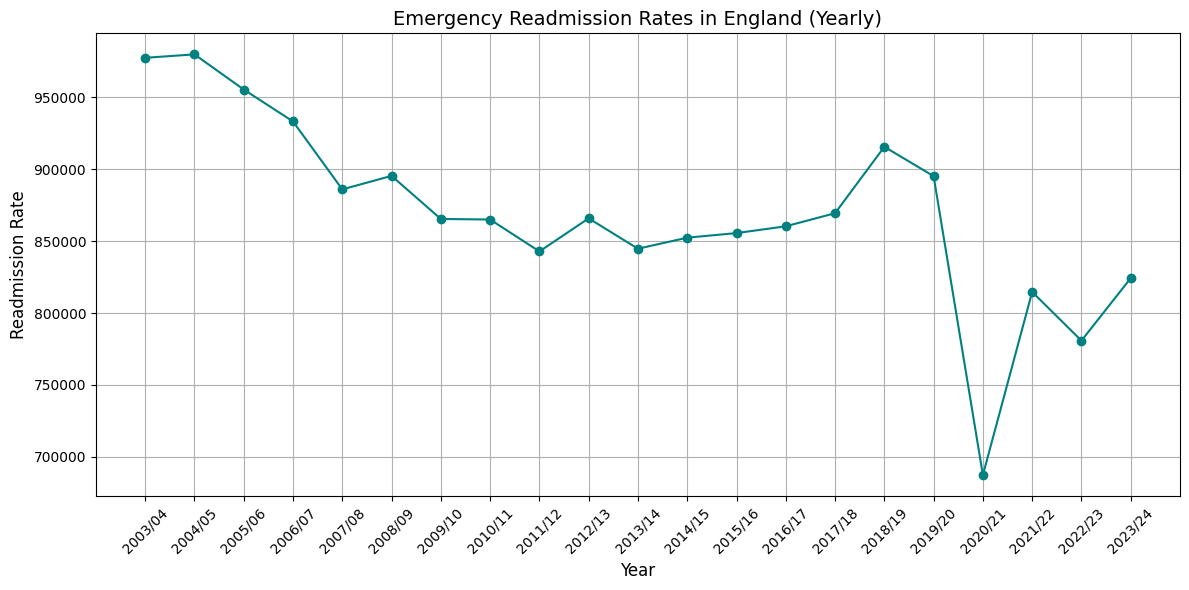

In [102]:
df_yearly = df[df['Year'].str.contains('/')].groupby('Year')['Indicator value'].sum().reset_index()
df_yearly = df_yearly.sort_values('Year')

plt.figure(figsize=(12, 6))
plt.plot(df_yearly['Year'], df_yearly['Indicator value'], marker='o', linestyle='-', color='teal')
plt.title('Emergency Readmission Rates in England (Yearly)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### -------Trends Observation --------

1. 2003/04 to 2011/12:
   - Steady decline from 372.32 to 320.64
   - Possible reasons:
     - Better care coordination
     - Policy shifts improving post-discharge support
2. 2012/13 to 2019/20:
    - A period of fluctuations:
      - Dips and rises between 319.86 and 344.84
      - No consistent pattern, but slight upward creep post-2014/15
      - Indicates variable performance or changing hospital pressures
3. 2020/21:
   - Sharp drop to 264.90 during COVID-19 - Likely due to fewer non-critical admissions or altered hospital activity during the pandemic
4. 2021/22 to 2023/24:
   - Rebound to 336.72 - Catch-up effect post-pandemic or Potential strain from backlog of cases or reduced capacity

------- Insights ---------
- Overall trend:
  - There’s a gradual decline in readmission rates from 2003/04 (372.32) to around 2011/12 (320.64).
  - This suggests improved discharge planning or healthcare practices during that decade.
- Stability Period:
  - Between 2012/13 and 2019/20, rates stayed relatively stable, fluctuating around 320–345.
- Sharp Drop During 2020/21:
  - The lowest rate (264.90) appears in 2020/21, which aligns with the COVID-19 pandemic. Possible causes: Fewer hospital admissions overall, Changes in patient behavior (avoiding hospitals), Altered hospital policies affecting readmission tracking.
- Post-COVID Recovery:
  - From 2021/22 onwards, the rate has been rising again, reaching 336.72 in 2023/24.
- The pandemic had a clear impact in 2020/21, which must be interpreted carefully in analysis.

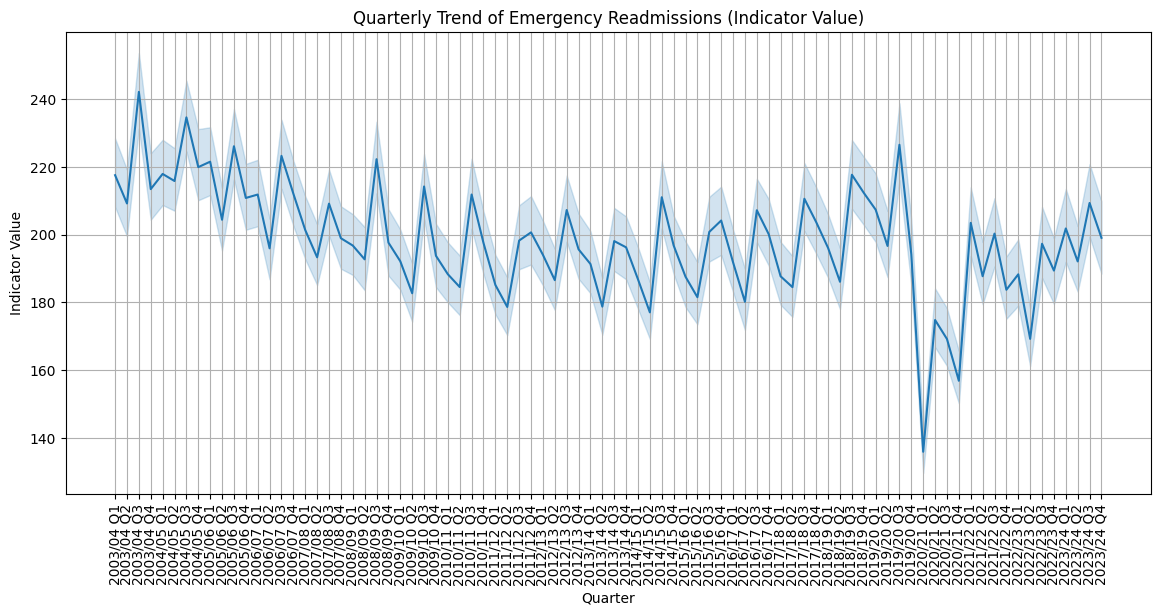

In [103]:
df_quarter = df[df['Quarter'].isin(['1', '2', '3', '4'])].copy()
df_annual = df[df['Quarter'].str.lower() == 'annual'].copy()

df_quarter['Year_Quarter'] = df_quarter['Year'] + ' Q' + df_quarter['Quarter']

df_quarter = df_quarter.sort_values(by=['Year', 'Quarter'])

plt.figure(figsize=(14,6))
sns.lineplot(data=df_quarter, x='Year_Quarter', y='Indicator value', markers='o')
plt.title('Quarterly Trend of Emergency Readmissions (Indicator Value)')
plt.xlabel('Quarter')
plt.ylabel('Indicator Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### Analysing Emergency Readmissions by Age Group

#### 1. Filter for Age Group Data Only

In [104]:
age_df = df[df['Category'] == 'Age group'].copy()
age_df.head()

,Year,Quarter,Period of coverage,Breakdown,Level,Level description,Indicator value,Lower CI,Upper CI,Standardised ratio,Standardised ratio lower CI,Standardised ratio upper CI,Observed,Population,Expected,Percent unclassified,Category
315,2023/24,Annual,1/4/2023 to 31/3/2024,Age,0 to 4,0 to 4,235.8,230.3,241.3,52.3,51.1,53.6,7225.0,3064600,13804.2,NaN,Age group
316,2023/24,Annual,1/4/2023 to 31/3/2024,Age,5 to 9,5 to 9,360.6,354.2,367.1,93.9,92.2,95.6,12073.0,3348800,12855.2,NaN,Age group
317,2023/24,Annual,1/4/2023 to 31/3/2024,Age,10 to 14,10 to 14,265.9,260.5,271.3,91.0,89.2,92.9,9382.0,3528900,10304.6,NaN,Age group
320,2023/24,Annual,1/4/2023 to 31/3/2024,Age,25 to 29,25 to 29,238.4,233.5,243.4,118.0,115.5,120.4,9011.0,3777800,7639.6,NaN,Age group
321,2023/24,Annual,1/4/2023 to 31/3/2024,Age,30 to 34,30 to 34,265.9,260.9,271.0,129.5,127.0,131.9,10693.0,4013400,8259.7,NaN,Age group


#### 2. Group by Year and Age Group

In [105]:
# Group by Year and Age Group, summing up the values
age_trend = age_df.groupby(['Year', 'Level description'])['Indicator value'].sum().reset_index()
age_trend.rename(columns={'Level description' : 'Age Group', 'Indicator value' : 'Readmissions'}, inplace=True)
age_trend

,Year,Age Group,Readmissions
0,2003/04,0 to 4,1153.7
1,2003/04,10 to 14,544.6
2,2003/04,25 to 29,391.4
3,2003/04,30 to 34,425.9
4,2003/04,35 to 39,508.3
...,...,...,...
352,2023/24,70 to 74,4308.2
353,2023/24,75 to 79,5748.8
354,2023/24,80 to 84,7989.8
355,2023/24,85 to 89,10220.6


#### 3. Visualise with Seaborn

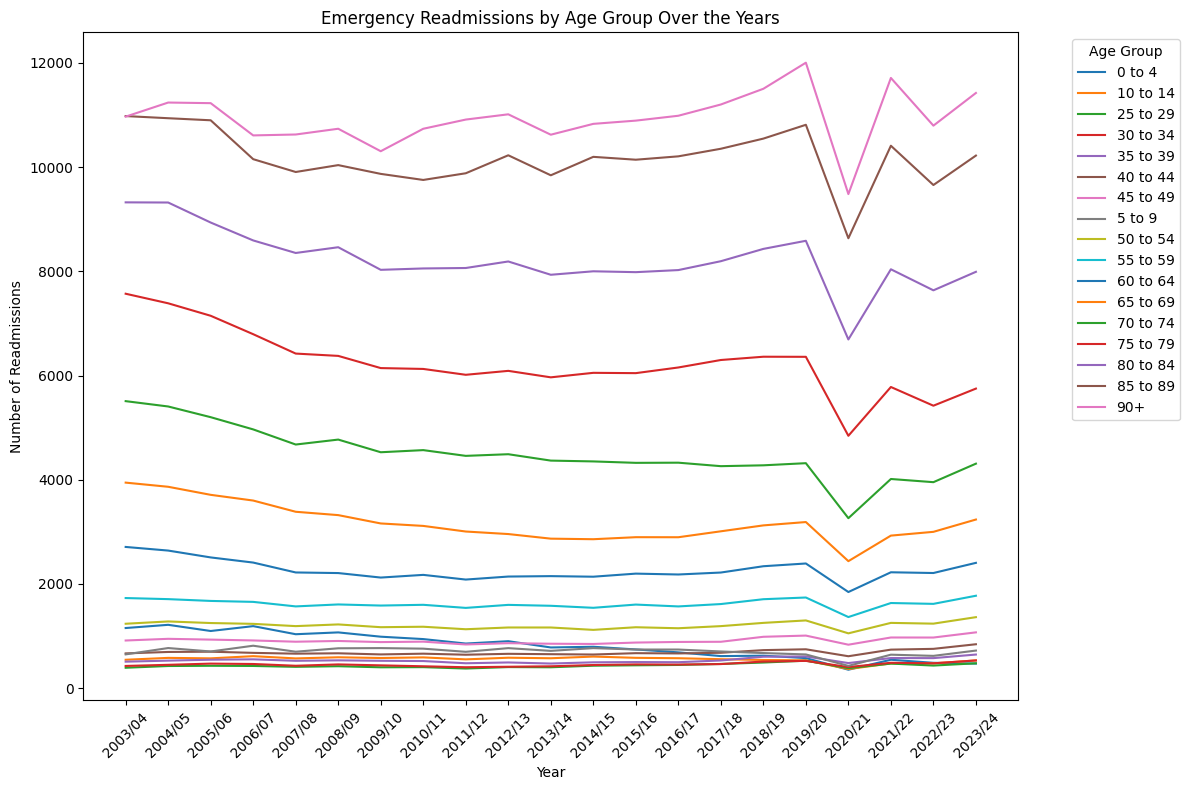

In [106]:
plt.figure(figsize=(12,8))
sns.lineplot(data=age_trend, x='Year', y='Readmissions', hue='Age Group', markers='o', palette='tab10')
plt.title('Emergency Readmissions by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Key Findings from Age Group Trend Analysis
- 90+ age group consistently records the highest number of emergency readmissions every year.
- A noticeable dip in readmissions occurred during 2020/21, likely due to the impact of the COVID-19 pandemic.
- This was followed by a rebound in 2021/22, a drop in 2022/23, and a slight rise again in 2023/24, forming a zig-zag pattern.
- Age groups 0 to 59 maintained a relatively steady and low rate of readmissions throughout the years.
- Age groups 60 to 80 mirrored the same overall trend as the total data, with rises and drops occurring in sync with national patterns.
- The 85 to 90+ age group showed the most irregular pattern, indicating potential external influences affecting elderly care or hospital readmissions.

### Gender Trend Analysis

#### 1. Filter and Group by Year and Gender

In [107]:
df['Category'].unique()

array(['National', 'Sex', 'Age group', 'Umknown', 'Region', 'Deprivation',
       'Condition'], dtype=object)

In [108]:
# Filter gender data
gender_df = df[df['Category'] == 'Sex'].copy()

# Group and summarize
gender_trend = gender_df.groupby(['Year', 'Level description'])['Indicator value'].sum().reset_index()
gender_trend.rename(columns={'Level description':'Gender', 'Indicator value':'Readmissions'}, inplace=True)
gender_trend.head()

,Year,Gender,Readmissions
0,2003/04,Female,1754.4
1,2003/04,Male,1978.8
2,2004/05,Female,1760.3
3,2004/05,Male,1998.0
4,2005/06,Female,1719.7


#### 2. Visualise

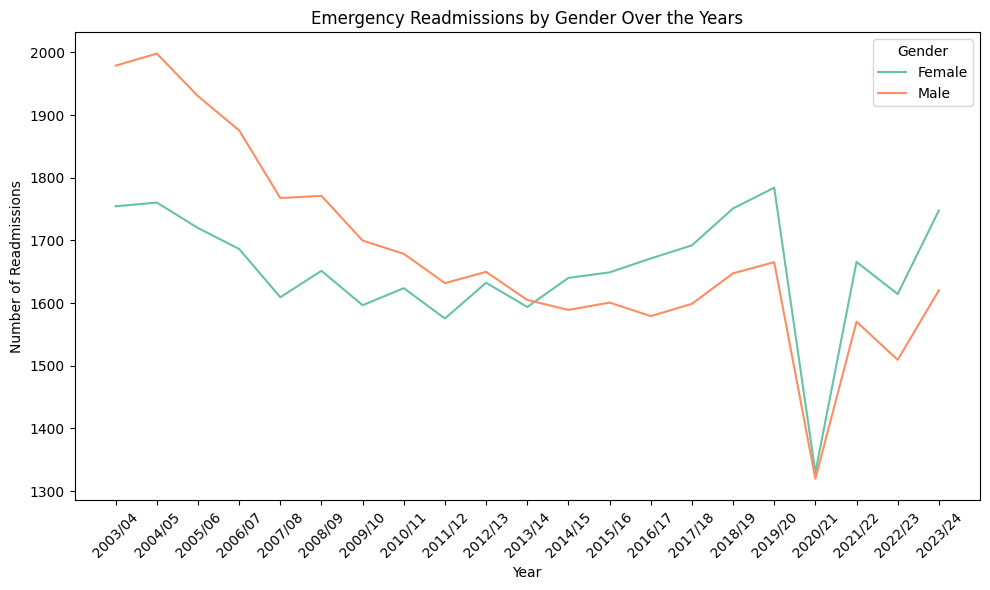

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_trend, x='Year', y='Readmissions', hue='Gender', markers='o', palette='Set2')
plt.title('Emergency Readmissions by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Gender-Based Emergency Readmission Trends (2003–2024)
- Overall trend closely mirrors the age group trend:
  - Drop from 2019/20 to 2020/21, likely pandemic-related
  - Followed by a rise in 2021/22
  - Another drop in 2022/23, then a rise in 2023/24
- In 2003/04, readmissions were higher for males than females
- Over time, male readmissions gradually declined, and by 2013/14, female readmissions surpassed male
- From 2013 onward, females consistently lead in readmission numbers

### Region-Based Emergency Readmission Trends

#### 1. Filter and Group by Year and Gender

In [110]:
# Filter region data
region_df = df[df['Category'] == 'Region'].copy()

# Group and summarize
region_trend = region_df.groupby(['Year', 'Level description'])['Indicator value'].sum().reset_index()
region_trend.rename(columns={'Level description':'Region', 'Indicator value':'Readmissions'}, inplace=True)
region_trend.head()

,Year,Region,Readmissions
0,2003/04,Adur,1487.5
1,2003/04,Allerdale,1984.3
2,2003/04,Amber Valley,1659.4
3,2003/04,Arun,1246.9
4,2003/04,Ashfield,2370.8


In [111]:
# Get top 5 regions by total readmissions
top_regions = (region_trend.groupby('Region')['Readmissions'].sum().sort_values(ascending=False).head(5).index.tolist())

# Filter only top regions
top_region_trends = region_trend[region_trend['Region'].isin(top_regions)]

#### 2. Visualise

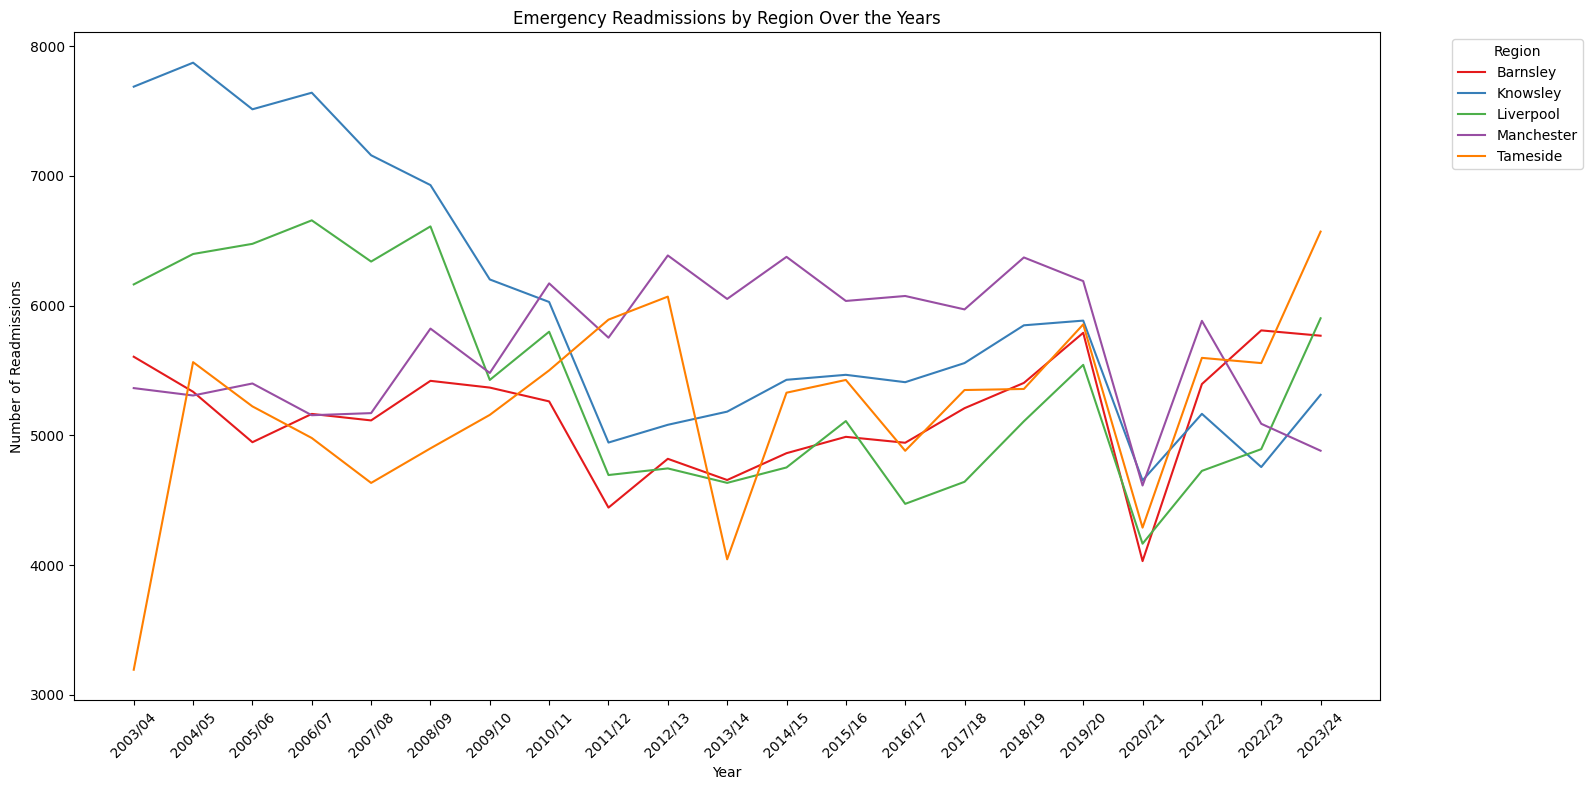

In [112]:
plt.figure(figsize=(16,8))
sns.lineplot(data=top_region_trends, x='Year', y='Readmissions', hue='Region', markers='o', palette='Set1')
plt.title('Emergency Readmissions by Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

####  Region-Based Emergency Readmission Trends (Top 5 Regions)
1. Top 5 regions by total readmissions:
   - Barnsley, Knowsley, Liverpool, Manchester, and Tameside
2. All regions show a dip in 2020/21, consistent with national trends (likely due to the pandemic).
3. Knowsley:
   - Initially led in readmissions (~7,600 in early years)
   - Gradually dropped to ~5,000 by 2011/12
4. Manchester:
   - Displayed a steady and consistent rise in readmissions from the beginning up to 2019/20
   - Indicates increasing healthcare demand or population
5. Tameside:
   - Exhibited the most fluctuation
   - Started from the bottom, saw two significant rises and two drops until 2019/20

### Condition-Based Emergency Readmission Trends

#### 1. Filter and Group by Year and Gender

In [113]:
# Filter condition-related data
condition_df = df[df['Category'] == 'Condition'].copy()

# Group by Year and Condition
condition_trend = condition_df.groupby(['Year', 'Level description'])['Indicator value'].sum().reset_index()
condition_trend.rename(columns={'Level description':'Condition', 'Indicator value':'Readmission'}, inplace=True)
condition_trend.head()

,Year,Condition,Readmission
0,2003/04,Acute bronchitis,0.6
1,2003/04,Angina pectoris,336.6
2,2003/04,Asthma,215.0
3,2003/04,Atrial fibrillation and flutter,193.4
4,2003/04,Bronchiectasis,14.9


#### 2. Focus on Top 7 Conditions

In [114]:
# Get top 7 conditions by total readmissions
top_conditions = condition_trend.groupby('Condition')['Readmission'].sum().sort_values(ascending=False).head(7).index.tolist()

# Filter data for only top conditions
top_condition_trend = condition_trend[condition_trend['Condition'].isin(top_conditions)]
top_condition_trend['Condition'].unique()

array(['Angina pectoris', 'Asthma', 'Atrial fibrillation and flutter',
       'Epilepsy', 'Heart failure', 'Insulin-dependent diabetes mellitus',
       'Other chronic obstructive pulmonary disease'], dtype=object)

#### 3. Visualise

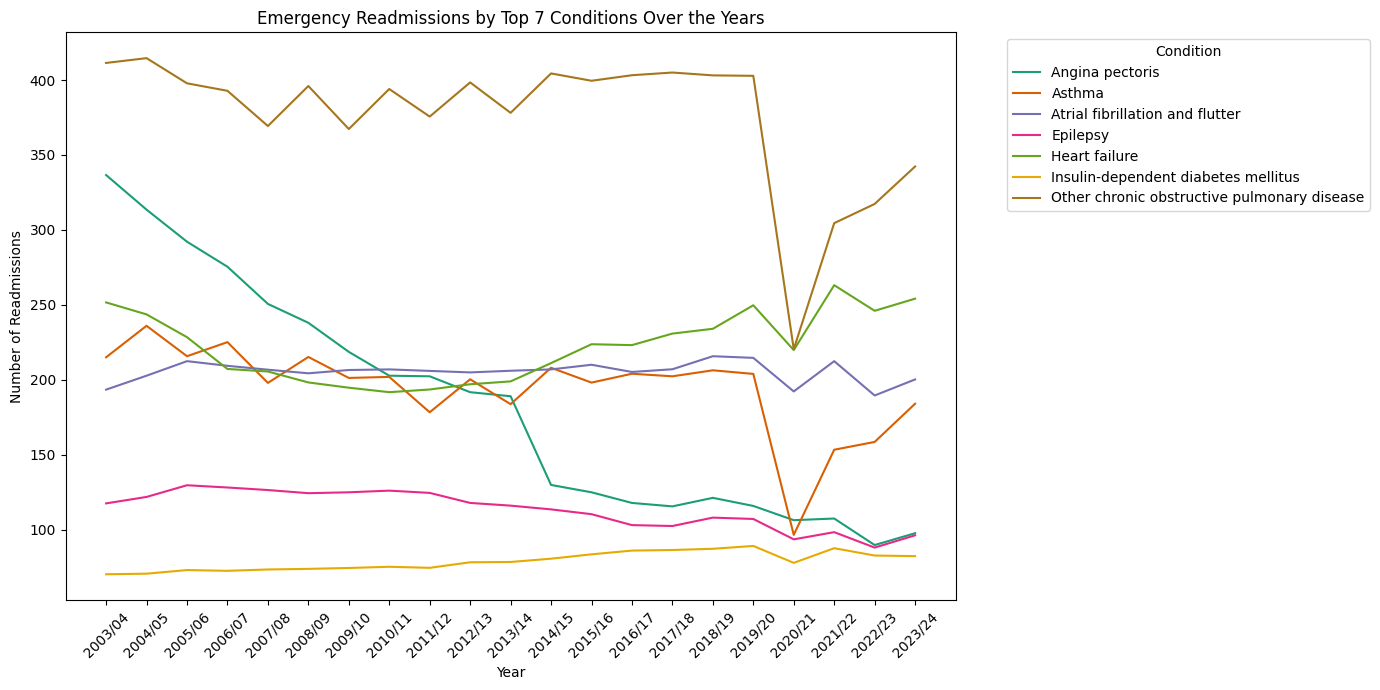

In [115]:
plt.figure(figsize=(14,7))
sns.lineplot(data=top_condition_trend, x='Year', y='Readmission', hue='Condition', markers='o', palette='Dark2')
plt.title('Emergency Readmissions by Top 7 Conditions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Condition-Based Emergency Readmission Trends (2003–2024)

1. Top 7 conditions by total readmissions:
   - Angina pectoris
   - Asthma
   - Atrial fibrillation and flutter
   - Epilepsy
   - Heart failure
   - Insulin-dependent diabetes mellitus
   - Other chronic obstructive pulmonary disease (COPD)
2. Key Insights:
   - A dip-rise pattern (notably around 2020/21–2021/22) is visible in:
   - Angina pectoris
   - Asthma
   - Atrial fibrillation and flutter
   - Epilepsy
3. Other COPD has the highest readmissions across all years, dominating the trendline.
4. Angina pectoris:
   - Dropped sharply from ~340 (2001) to ~100 (2024)
   - Indicates potential improvement in preventive care or treatment
5. Heart failure:
   - Declined until 2013/14, then rose consistently
   - Could signal aging population impact or care quality variation
6. Atrial fibrillation and flutter:
   - Exhibits a cyclical rise-and-drop pattern
   - Started and ended around 200 — consistent yet fluctuating
7. Epilepsy and Insulin-dependent diabetes mellitus:
   - Both remained low throughout: Epilepsy under 150, Diabetes under 100
   - Still important due to chronic nature and risk of complications